## 📦 1. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style='whitegrid')


In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Basic info and check for missing values
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## 📊 3. Explore the Data


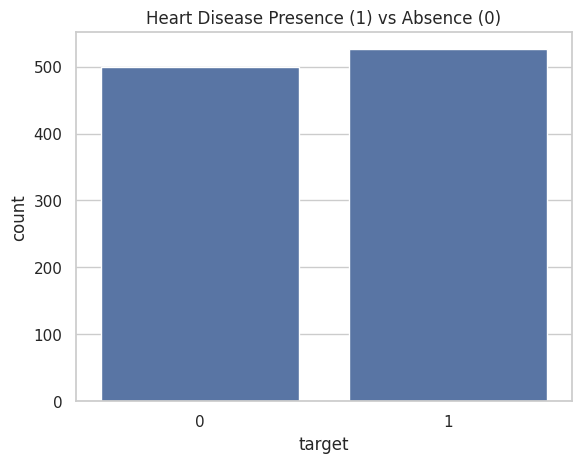

In [ ]:
### Target Distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()


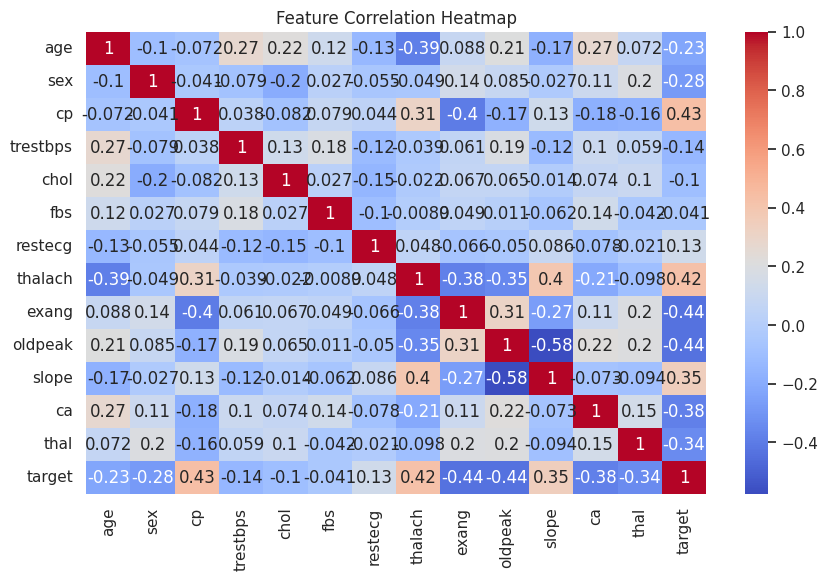

In [ ]:
### Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## 🧹 4. Data Preparation


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🌳 5. Train a Decision Tree


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Train Accuracy:", dt.score(X_train, y_train))
print("Test Accuracy:", dt.score(X_test, y_test))



Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


### Visualize the Tree


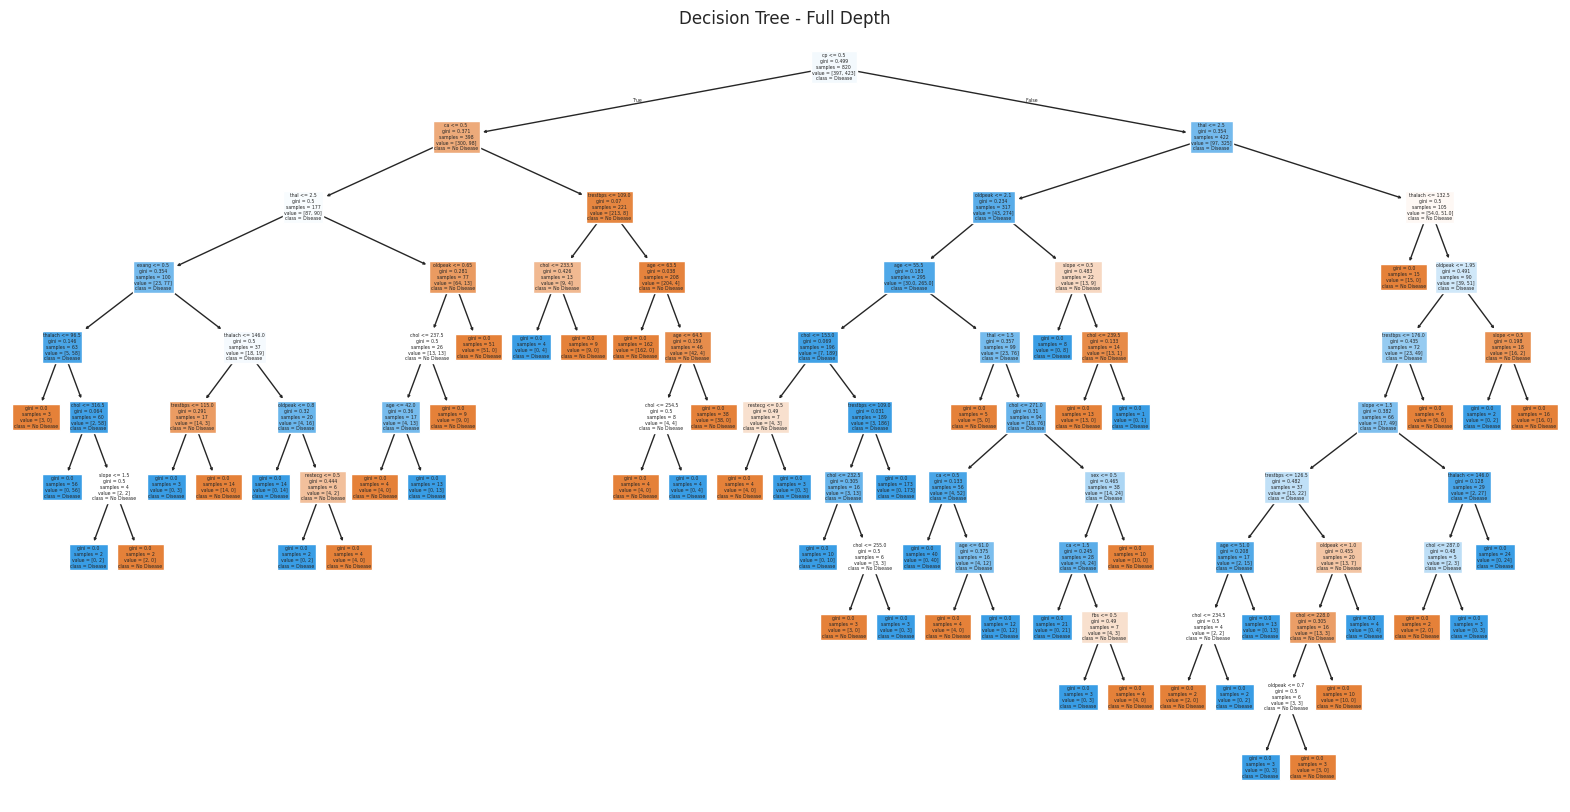

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree - Full Depth")
plt.show()

## ✂️ 6. Limit Tree Depth


In [ ]:
best_score = 0
best_depth = None

for depth in range(2, 15):  # Try depths from 2 to 14
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()
    print(f"Depth: {depth}, Cross-validated accuracy: {mean_score:.3f}")
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

print(f"\nBest max_depth: {best_depth}, Cross-validated accuracy: {best_score:.3f}")

Depth: 2, Cross-validated accuracy: 0.759
Depth: 3, Cross-validated accuracy: 0.839
Depth: 4, Cross-validated accuracy: 0.846
Depth: 5, Cross-validated accuracy: 0.887
Depth: 6, Cross-validated accuracy: 0.916
Depth: 7, Cross-validated accuracy: 0.946
Depth: 8, Cross-validated accuracy: 0.959
Depth: 9, Cross-validated accuracy: 0.974
Depth: 10, Cross-validated accuracy: 0.976
Depth: 11, Cross-validated accuracy: 0.976
Depth: 12, Cross-validated accuracy: 0.976
Depth: 13, Cross-validated accuracy: 0.976
Depth: 14, Cross-validated accuracy: 0.976

Best max_depth: 10, Cross-validated accuracy: 0.976


## 🌲 7. Random Forest Classifier


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



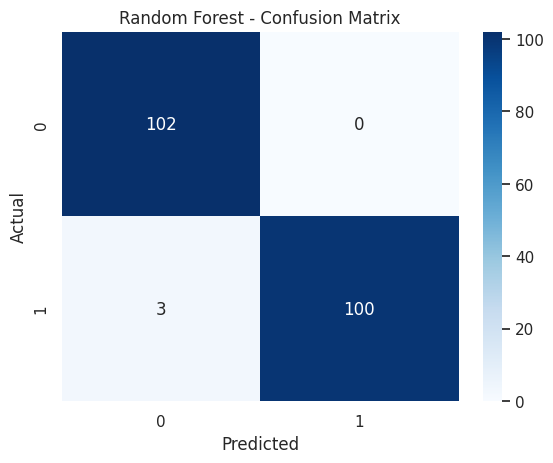

In [ ]:
### Evaluate Model
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🔍 8. Feature Importance


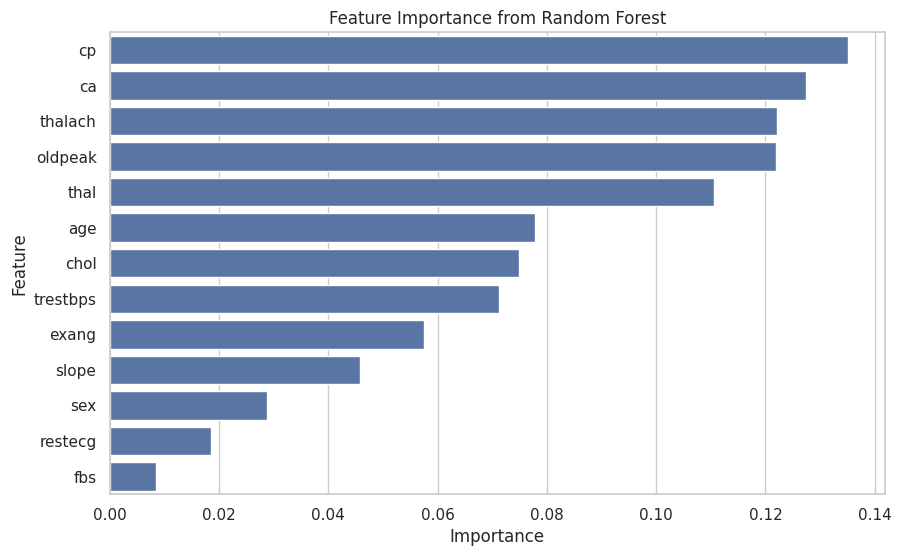

In [ ]:
importances = rf.feature_importances_
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance from Random Forest")
plt.show()

## 🔁 9. Cross-Validation


In [ ]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average Accuracy: 0.9970731707317073
